# How to use Loc? 

In [2]:
import pandas as pd
import numpy as np

data = [
    {"name": "Alice", "age": 30, "city": "New York"},
    {"name": "Bob", "age": 25, "city": "Los Angeles"},
    {"name": "Charlie", "age": 35, "city": "Chicago"},
    {"name": "David", "age": 28, "city": "Houston"},
    {"name": "Eve", "age": 22, "city": "Phoenix"},
]

df = pd.DataFrame(data)
print(df.head())

      name  age         city
0    Alice   30     New York
1      Bob   25  Los Angeles
2  Charlie   35      Chicago
3    David   28      Houston
4      Eve   22      Phoenix


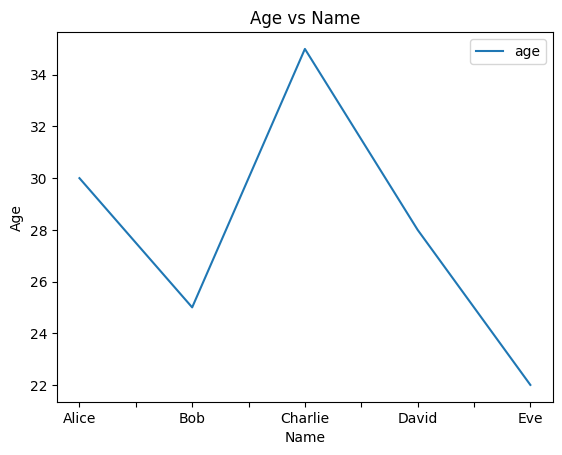

In [ ]:
"""
In pandas, you can use the `plot` method to create various types of plots.
For example, to create a simple line plot of the 'age' column against the 'name' column, you can do the following:
"""

import matplotlib.pyplot as plt

df.plot(x="name", y="age")
plt.xlabel("Name")
plt.ylabel("Age")
plt.title("Age vs Name")
plt.show()

In [2]:
# Select the row where the name is 'Alice'
alice_row = df.loc[df['name'] == 'Alice']
print(alice_row)

    name  age      city
0  Alice   30  New York


In [3]:
age_more_than_25_loc = df.loc[df['age'] > 25]
print(age_more_than_25_loc)

      name  age      city
0    Alice   30  New York
2  Charlie   35   Chicago
3    David   28   Houston


In [4]:
# Example of iloc: Select the first row
first_row_iloc = df.iloc[0]
print("Using iloc:\n", first_row_iloc)

# Example of xs: Select the row with index 2
row_xs = df.xs(2)
print("\nUsing xs:\n", row_xs)

# Example of at: Access the value in the first row and 'city' column
city_at = df.at[0, 'city']
print("\nUsing at:\n", city_at)

Using iloc:
 name       Alice
age           30
city    New York
Name: 0, dtype: object

Using xs:
 name    Charlie
age          35
city    Chicago
Name: 2, dtype: object

Using at:
 New York


In [6]:
# Example: Select rows where the age is an even number
even_age_condition = np.mod(df['age'], 2) == 0
even_age_rows = df.loc[even_age_condition]
print(even_age_rows)

    name  age      city
0  Alice   30  New York
3  David   28   Houston
4    Eve   22   Phoenix


In [7]:
# Define conditions and corresponding choices
conditions = [
    df['age'] < 25,
    (df['age'] >= 25) & (df['age'] < 30),
    df['age'] >= 30
]
choices = ['Young', 'Mid-age', 'Senior']

# Use numpy.select to create a new column 'age_group'
df['age_group'] = np.select(conditions, choices, default='Unknown')
print(df)

      name  age         city age_group
0    Alice   30     New York    Senior
1      Bob   25  Los Angeles   Mid-age
2  Charlie   35      Chicago    Senior
3    David   28      Houston   Mid-age
4      Eve   22      Phoenix     Young


In [8]:
# Using df.iterrows (slow)
df['age_in_5_years_iterrows'] = [row['age'] + 5 for _, row in df.iterrows()]

# Using vectorized operation (fast)
df['age_in_5_years_vectorized'] = df['age'] + 5

print(df[['name', 'age', 'age_in_5_years_iterrows', 'age_in_5_years_vectorized']])

      name  age  age_in_5_years_iterrows  age_in_5_years_vectorized
0    Alice   30                       35                         35
1      Bob   25                       30                         30
2  Charlie   35                       40                         40
3    David   28                       33                         33
4      Eve   22                       27                         27


# Iterating Over DataFrames in Pandas

There are several ways to iterate over a DataFrame in Pandas. Below are some common methods:

## 1. Using `iterrows()`
This method iterates over rows as (index, Series) pairs. It is slow for large DataFrames but useful for row-wise operations.

```python
for index, row in df.iterrows():
    print(f"Index: {index}, Name: {row['name']}, Age: {row['age']}")
```

## 2. Using `itertuples()`
This method iterates over rows as namedtuples. It is faster than `iterrows()`.

```python
for row in df.itertuples():
    print(f"Index: {row.Index}, Name: {row.name}, Age: {row.age}")
```

## 3. Using `apply()`
For element-wise operations, `apply()` is a vectorized and efficient approach.

```python
df['age_squared'] = df['age'].apply(lambda x: x ** 2)
```

## 4. Using `zip()`
You can use Python's built-in `zip()` function to iterate over multiple columns simultaneously.

```python
for name, age in zip(df['name'], df['age']):
    print(f"Name: {name}, Age: {age}")
```

## 5. Using `itertools`
The `itertools` module can be used for advanced iteration patterns. For example, you can use `itertools.product` to iterate over combinations of rows.

```python
import itertools

for row1, row2 in itertools.combinations(df.iterrows(), 2):
    print(f"Row 1: {row1[1]['name']}, Row 2: {row2[1]['name']}")
```

## 6. Using Vectorized Operations (Preferred)
Whenever possible, avoid explicit iteration and use vectorized operations for better performance.

```python
df['age_plus_10'] = df['age'] + 10
```

## Summary
While `iterrows()` and `itertuples()` are useful for small DataFrames or specific use cases, vectorized operations are always preferred for performance. The `itertools` module can be helpful for advanced iteration patterns, but it should be used sparingly to avoid performance bottlenecks.


In [ ]:
import time

# Use pandas.eval to calculate a new column 'age_plus_10' efficiently
df['age_plus_10'] = pd.eval('df.age + 10')

# Measure the performance of using pandas.eval for the calculation
start_time = time.time()
df['age_plus_10_eval'] = pd.eval('df.age + 10')
end_time = time.time()

print(df[['name', 'age', 'age_plus_10', 'age_plus_10_eval']])

# Using %timeit for performance measurement
%timeit pd.eval('df.age + 10')



      name  age  age_plus_10  age_plus_10_eval
0    Alice   30           40                40
1      Bob   25           35                35
2  Charlie   35           45                45
3    David   28           38                38
4      Eve   22           32                32
382 μs ± 23.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
